# **06 Data Cleaning and Feature Engineering**

# Objectives

## Clean data and engineer features for modelling
- ETL: Impute/handle missing values
- ETL: Treat outliers
- ETL: Encode categoricals
- ETL: Scale/normalise features
- ETL: Engineer domain features
- ETL: Save cleaned dataset

## Inputs

* Merged housing data sources data file: ppd_with_geography_and_imd_epc.csv

## Outputs

* housing.csv

---


## ETL: Impute/handle missing values

Load libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import ipywidgets as widgets
from sklearn.pipeline import Pipeline

In [31]:
# load the data
df = pd.read_csv('../data/clean/ppd_with_geography_and_imd_epc.csv')
df.head()

,transaction,price,transfer_date,postcode,property_type,new_build,tenure,PAON,SAON,Street,...,msoa11nm,ladnm,IMD_Decile,IMD_Rank,addr_key,exact_key_no_saon,current_energy_rating,total_floor_area,matched_key,match_score
0,{3DCCB7C9-D239-5B9D-E063-4704A8C0331E},340000,2003-11-28 00:00,DE73 7JQ,S,N,F,COBWEB BARN,NaN,INGLEBY LANE,...,South Derbyshire 006,South Derbyshire,7.0,20607.0,cobweb barn ingleby lane de73 7jq,cobweb barn ingleby lane de73 7jq,NaN,NaN,NaN,NaN
1,{3DCCB7C9-D364-5B9D-E063-4704A8C0331E},450000,2006-03-17 00:00,DE7 6GU,D,N,F,3,NaN,BEECH LANE,...,Erewash 005,Erewash,10.0,29988.0,3 beech lane de7 6gu,3 beech lane de7 6gu,D,57.0,NaN,NaN
2,{3DCCB7CA-8C58-5B9D-E063-4704A8C0331E},350000,2001-07-19 00:00,CV4 7PA,D,N,F,1,NaN,THE LAURELS,...,Coventry 042,Coventry,9.0,29510.0,1 the laurels cv4 7pa,1 the laurels cv4 7pa,C,354.0,3 the laurels fairlands park cv4 7pa,95.0
3,{3DCCB7CA-1DAB-5B9D-E063-4704A8C0331E},295000,2021-05-21 00:00,LE14 3QL,D,N,F,4,NaN,HOUGHTON CLOSE,...,Melton 003,Melton,6.0,16968.0,4 houghton close le14 3ql,4 houghton close le14 3ql,C,130.0,4 houghton close asfordby hill le14 3ql,100.0
4,{3DCCB7CA-1EF1-5B9D-E063-4704A8C0331E},600000,2021-12-20 00:00,DE73 8LF,D,Y,F,10,NaN,PRIORY CLOSE,...,North West Leicestershire 001,North West Leicestershire,7.0,19826.0,10 priory close de73 8lf,10 priory close de73 8lf,C,193.0,10 priory close breedon on the hill de73 8lf,100.0


---

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7619 entries, 0 to 7618
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction            7619 non-null   object 
 1   price                  7619 non-null   int64  
 2   transfer_date          7619 non-null   object 
 3   postcode               7619 non-null   object 
 4   property_type          7619 non-null   object 
 5   new_build              7619 non-null   object 
 6   tenure                 7619 non-null   object 
 7   PAON                   7619 non-null   object 
 8   SAON                   437 non-null    object 
 9   Street                 7581 non-null   object 
 10  Locality               3199 non-null   object 
 11  town_city              7619 non-null   object 
 12  district               7619 non-null   object 
 13  county                 7619 non-null   object 
 14  PPD_category           7619 non-null   object 
 15  Stat

# Handle missing values

In [33]:
# show number of missing values in each column
df.isnull().sum()


transaction                 0
price                       0
transfer_date               0
postcode                    0
property_type               0
new_build                   0
tenure                      0
PAON                        0
SAON                     7182
Street                     38
Locality                 4420
town_city                   0
district                    0
county                      0
PPD_category                0
Status                      0
lsoa11cd                    0
msoa11nm                    0
ladnm                       0
IMD_Decile                  0
IMD_Rank                    0
addr_key                    0
exact_key_no_saon           0
current_energy_rating      50
total_floor_area           50
matched_key              4370
match_score              4370
dtype: int64

In [34]:
# check for missing floor area values
df['total_floor_area'].isnull().sum()
# delete rows for missing floor area values
df = df[df['total_floor_area'].notnull()]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7569 entries, 1 to 7618
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction            7569 non-null   object 
 1   price                  7569 non-null   int64  
 2   transfer_date          7569 non-null   object 
 3   postcode               7569 non-null   object 
 4   property_type          7569 non-null   object 
 5   new_build              7569 non-null   object 
 6   tenure                 7569 non-null   object 
 7   PAON                   7569 non-null   object 
 8   SAON                   428 non-null    object 
 9   Street                 7531 non-null   object 
 10  Locality               3163 non-null   object 
 11  town_city              7569 non-null   object 
 12  district               7569 non-null   object 
 13  county                 7569 non-null   object 
 14  PPD_category           7569 non-null   object 
 15  Status   

---

In [35]:
# check data types
df.dtypes
# summary statistics
df.describe()
# check for duplicates
df.duplicated().sum()


0

In [36]:
"""
drop the columns that are not needed for analysis
Columns marked with * are to be dropped
0 transaction 7569 non-null object
1 price 7569 non-null int64  
2 transfer_date 7569 non-null object  
3 postcode 7569 non-null object  
4 property_type 7569 non-null object  
5 new_build 7569 non-null object  
6 tenure 7569 non-null object  
7 PAON 7569 non-null object  
8 SAON 428 non-null object  
9 Street 7531 non-null object  
10 Locality 3163 non-null object  
11 town_city 7569 non-null object  
12 district 7569 non-null object  
13 county 7569 non-null object  
*14 PPD_category 7569 non-null object  
*15 Status 7569 non-null object  
16 lsoa11cd 7569 non-null object  
17 msoa11nm 7569 non-null object  
18 ladnm 7569 non-null object  
19 IMD_Decile 7569 non-null float64  
20 IMD_Rank 7569 non-null float64  
*21 addr_key 7569 non-null object  
*22 exact_key_no_saon 7569 non-null object  
23 current_energy_rating 7569 non-null object  
24 total_floor_area 7569 non-null float64  
*25 matched_key 3249 non-null object  
*26 match_score 3249 non-null float64
"""
# drop the columns that are not needed for analysis 
df = df.drop(columns=['PPD_category', 'Status', 'exact_key_no_saon', 'matched_key', 'match_score'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7569 entries, 1 to 7618
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction            7569 non-null   object 
 1   price                  7569 non-null   int64  
 2   transfer_date          7569 non-null   object 
 3   postcode               7569 non-null   object 
 4   property_type          7569 non-null   object 
 5   new_build              7569 non-null   object 
 6   tenure                 7569 non-null   object 
 7   PAON                   7569 non-null   object 
 8   SAON                   428 non-null    object 
 9   Street                 7531 non-null   object 
 10  Locality               3163 non-null   object 
 11  town_city              7569 non-null   object 
 12  district               7569 non-null   object 
 13  county                 7569 non-null   object 
 14  lsoa11cd               7569 non-null   object 
 15  msoa11nm 

Check if any properties have had more than one transaction in the PPD data

In [37]:
# is addr_key unique?
df['addr_key'].is_unique
# are there duplicate addr_key values?
df['addr_key'].duplicated().sum()
# what are the duplicate addr_key values?
df[df['addr_key'].duplicated(keep=False)].sort_values('addr_key')
# keep only the last date for each addr_key
df = df.sort_values('transfer_date').drop_duplicates('addr_key', keep='last')

In [38]:
# date conversion
df['transfer_date'] = pd.to_datetime(df['transfer_date'], errors='coerce')
df['year'] = df['transfer_date'].dt.year

In [39]:
# Use data profiling using ydata_profiling to generate a report to identify any other data quality issues
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_file("../reports/data_profiling_report.html")
# check for outliers

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 23/23 [00:02<00:00,  9.75it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Considerations from the profile report**
alerts in the profile report:

IMD_Decile and IMD_Rank: High correlation
Action: keep only IMD_Decile as a feature

current_energy_rating and new_build: High correlation
New builds usually have a higher EPC.
Action: create an interaction (new_build × energy_band_num) 
new_build needs to be a numeric flag

price and total_floor_area: High correlation
As expected, no action

property_type and tenure: High correlation
Flats are often leasehold
Action: create an interaction flag: is_flat & is_leasehold 

price is skewed 
Action: Use log1p(price) as the target 
Action: remove outliers


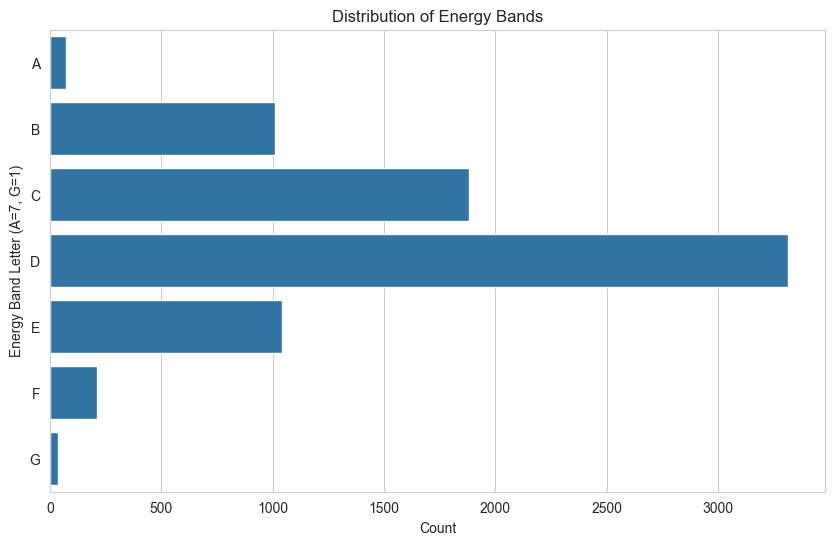

In [40]:
# Energy band A is best, G is worst
# create a new numeric feature energy_band_num where A=7, B=6, C=5, D=4, E=3, F=2, G=1
df['energy_band_num'] = df['current_energy_rating'].map({
    'A': 7,
    'B': 6,
    'C': 5,
    'D': 4,
    'E': 3,
    'F': 2,
    'G': 1
 })

# plot of Energy band distribution best to worst
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='energy_band_num', order=sorted(df['energy_band_num'].unique(), reverse=True))
plt.title('Distribution of Energy Bands')
plt.ylabel('Energy Band Letter (A=7, G=1)')
plt.xlabel('Count')
plt.yticks(ticks=range(7), labels=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

In [41]:
# new_build needs to be a numeric flag
# Action: create an interaction (is_new_build_energy_band_num) 
df['is_new_build'] = df['new_build'].map({'Y': 1, 'N': 0}).astype(int)
df['is_new_build'].value_counts()
df['is_new_build_energy_band_num'] = df['is_new_build'] * df['energy_band_num']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7566 entries, 110 to 6680
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   transaction                   7566 non-null   object        
 1   price                         7566 non-null   int64         
 2   transfer_date                 7566 non-null   datetime64[ns]
 3   postcode                      7566 non-null   object        
 4   property_type                 7566 non-null   object        
 5   new_build                     7566 non-null   object        
 6   tenure                        7566 non-null   object        
 7   PAON                          7566 non-null   object        
 8   SAON                          428 non-null    object        
 9   Street                        7528 non-null   object        
 10  Locality                      3162 non-null   object        
 11  town_city                     756

In [42]:
# create an outcode feature from the postcode column, this may be a useful geographic feature
df['outcode'] = df['postcode'].str.extract(r'^([A-Z]{1,2}\d{1,2}[A-Z]?)')
df['outcode'] = df['outcode'].str.strip()

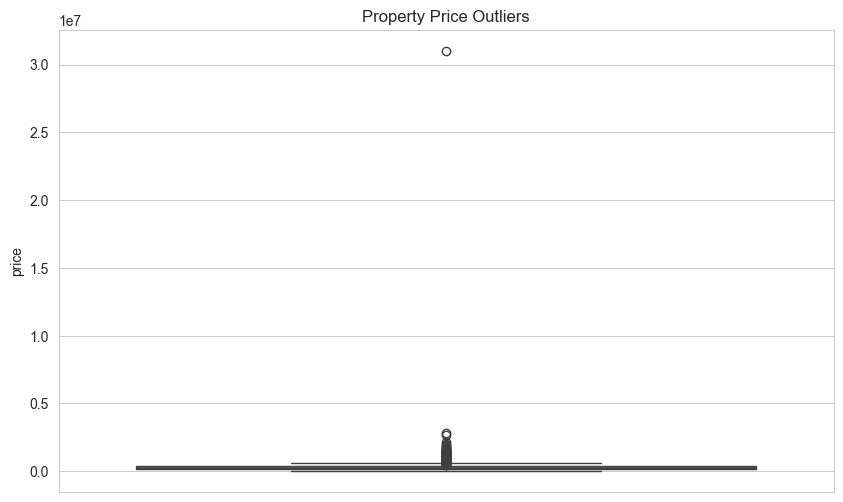

In [43]:
# Handle outliers in property price 
# plot boxplots to visualize price outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['price'])
plt.title('Property Price Outliers')
plt.show()


In [44]:
# remove any properties with extreme prices
# calculate the 1st and 99th percentiles
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] > q_low) & (df['price'] < q_high)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7404 entries, 110 to 6680
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   transaction                   7404 non-null   object        
 1   price                         7404 non-null   int64         
 2   transfer_date                 7404 non-null   datetime64[ns]
 3   postcode                      7404 non-null   object        
 4   property_type                 7404 non-null   object        
 5   new_build                     7404 non-null   object        
 6   tenure                        7404 non-null   object        
 7   PAON                          7404 non-null   object        
 8   SAON                          401 non-null    object        
 9   Street                        7372 non-null   object        
 10  Locality                      3092 non-null   object        
 11  town_city                     740

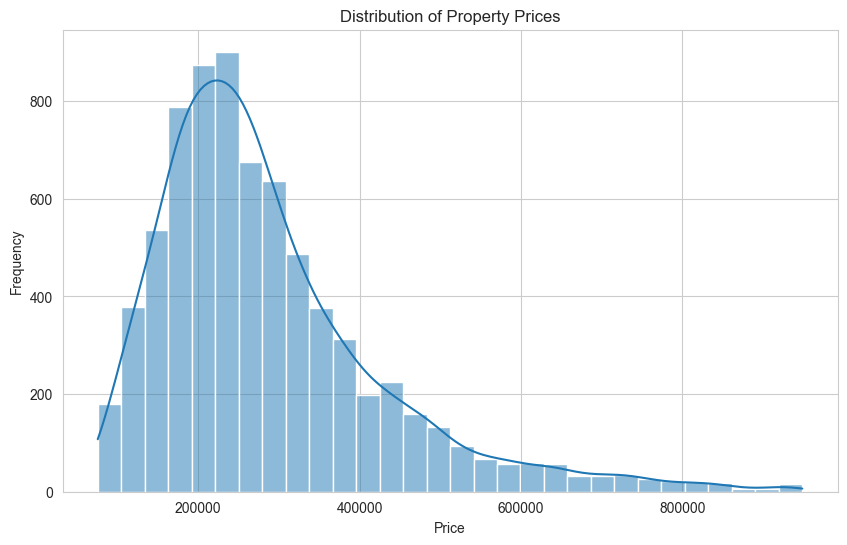

In [45]:
# Histogram of price
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [46]:
# This is a clearly a skewed distribution so log transform
df = df.copy()
df['log_price'] = np.log1p(df['price'])

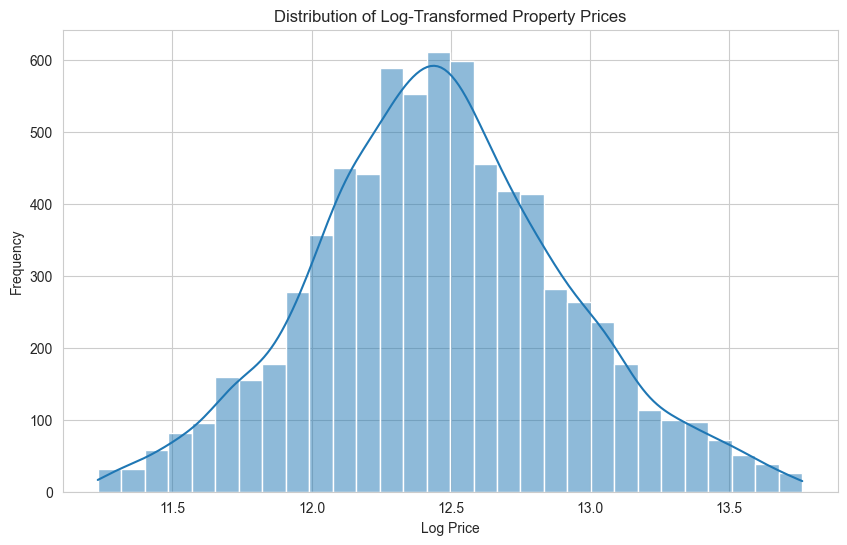

In [47]:
# distribution of log_price
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='log_price', bins=30, kde=True)
plt.title('Distribution of Log-Transformed Property Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()


In [48]:
# This is now more normally distributed
# calculate skewness and kurtosis
skewness = df['log_price'].skew()
kurtosis = df['log_price'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

Skewness: 0.12361919733457648, Kurtosis: -0.029516234850682554


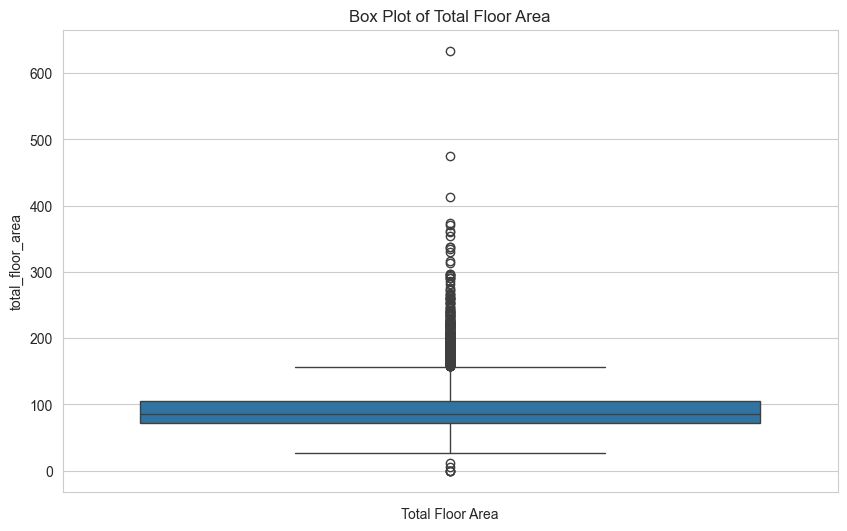

In [49]:
# box plot of total_floor_area
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='total_floor_area')
plt.title('Box Plot of Total Floor Area')
plt.xlabel('Total Floor Area')
plt.show()


In [50]:
# There are some extreme outliers in total_floor_area
# remove outliers outside the 1st and 99th percentiles
q_low = df['total_floor_area'].quantile(0.01)
q_high = df['total_floor_area'].quantile(0.99)
df = df[(df['total_floor_area'] > q_low) & (df['total_floor_area'] < q_high)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7248 entries, 110 to 6680
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   transaction                   7248 non-null   object        
 1   price                         7248 non-null   int64         
 2   transfer_date                 7248 non-null   datetime64[ns]
 3   postcode                      7248 non-null   object        
 4   property_type                 7248 non-null   object        
 5   new_build                     7248 non-null   object        
 6   tenure                        7248 non-null   object        
 7   PAON                          7248 non-null   object        
 8   SAON                          371 non-null    object        
 9   Street                        7219 non-null   object        
 10  Locality                      3020 non-null   object        
 11  town_city                     724

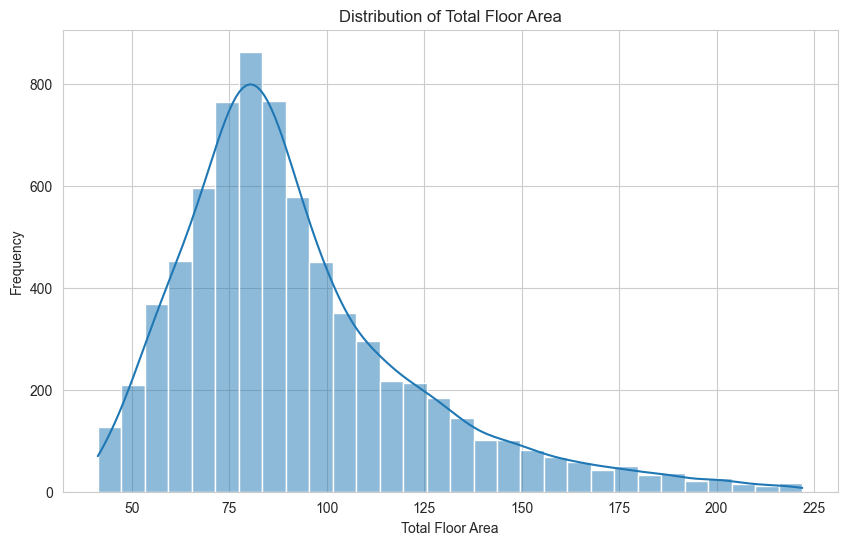

In [51]:
# distribution of total_floor_area
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_floor_area', bins=30, kde=True)
plt.title('Distribution of Total Floor Area')
plt.xlabel('Total Floor Area')
plt.ylabel('Frequency')
plt.show()


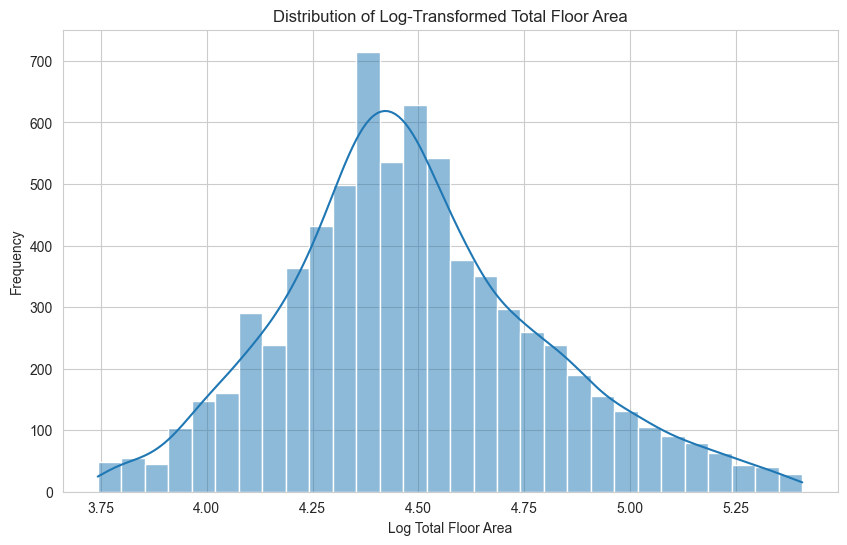

In [52]:
# log transform total_floor_area to reduce skewness
df['log_total_floor_area'] = np.log1p(df['total_floor_area'])
# distribution of log_total_floor_area
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='log_total_floor_area', bins=30, kde=True)
plt.title('Distribution of Log-Transformed Total Floor Area')
plt.xlabel('Log Total Floor Area')
plt.ylabel('Frequency')
plt.show()

In [53]:
# skewness and kurtosis of log_total_floor_area
skewness = df['log_total_floor_area'].skew()
kurtosis = df['log_total_floor_area'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

Skewness: 0.3705604570503012, Kurtosis: 0.05905706300425573


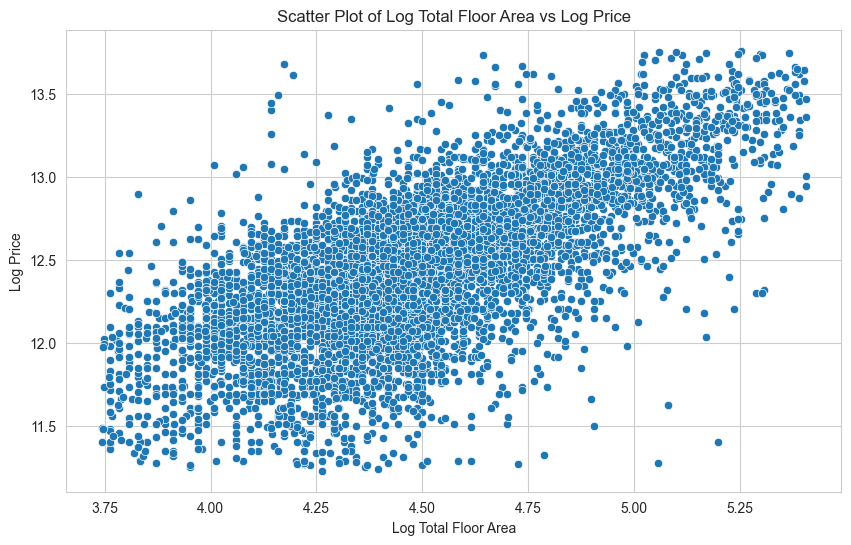

In [54]:
# plot scatterplot of log_price vs log_total_floor_area 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_total_floor_area', y='log_price')
plt.title('Scatter Plot of Log Total Floor Area vs Log Price')
plt.xlabel('Log Total Floor Area')
plt.ylabel('Log Price')
plt.show()


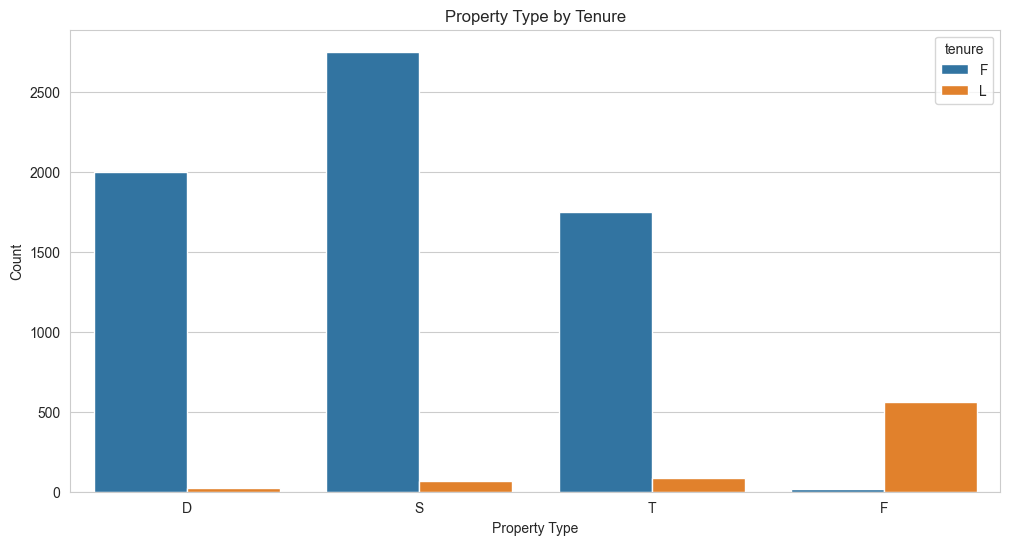

In [55]:
# plot the property_type and tenure 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='property_type', hue='tenure')
plt.title('Property Type by Tenure')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

Clearly, the vast majority of flats are leasehold.
Action: create an interaction flag: is_flat & is_leasehold 

In [61]:
# Action: create an interaction flag: is_flat & is_leasehold 
df['is_flat'] = df['property_type'] == 'F'
df['is_leasehold'] = df['tenure'] == 'L'
df['is_flat_leasehold'] = df['is_flat'] & df['is_leasehold']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7248 entries, 110 to 6680
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   transaction                   7248 non-null   object        
 1   price                         7248 non-null   int64         
 2   transfer_date                 7248 non-null   datetime64[ns]
 3   postcode                      7248 non-null   object        
 4   property_type                 7248 non-null   object        
 5   new_build                     7248 non-null   int32         
 6   tenure                        7248 non-null   object        
 7   PAON                          7248 non-null   object        
 8   SAON                          371 non-null    object        
 9   Street                        7219 non-null   object        
 10  Locality                      3020 non-null   object        
 11  town_city                     724

In [62]:
df.head(100)

,transaction,price,transfer_date,postcode,property_type,new_build,tenure,PAON,SAON,Street,...,year,energy_band_num,is_new_build,is_new_build_energy_band_num,outcode,log_price,log_total_floor_area,is_flat,is_leasehold,is_flat_leasehold
110,{3DCCB7C9-D19E-5B9D-E063-4704A8C0331E},79000,1996-11-29,S18 1QH,D,0,F,27,NaN,HOLBEIN CLOSE,...,1996,4,0,0,S18,11.277216,5.056373,False,False,False
58,{3DCCB7CA-8C30-5B9D-E063-4704A8C0331E},192000,2005-03-14,B44 0JR,S,0,F,56,NaN,HORNSEY ROAD,...,2005,3,0,0,B44,12.165256,4.355041,False,False,False
59,{3DCCB7CA-8CCC-5B9D-E063-4704A8C0331E},170000,2005-05-20,DY4 7NY,S,1,F,22,NaN,DARBYS WAY,...,2005,4,1,4,DY4,12.043560,4.634729,False,False,False
1,{3DCCB7C9-D364-5B9D-E063-4704A8C0331E},450000,2006-03-17,DE7 6GU,D,0,F,3,NaN,BEECH LANE,...,2006,4,0,0,DE7,13.017005,4.060443,False,False,False
172,{3DCCB7CA-8D25-5B9D-E063-4704A8C0331E},124950,2008-06-11,DY8 3UJ,T,0,F,76,NaN,SOUTH ROAD,...,2008,3,0,0,DY8,11.735677,4.117898,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,{3DCCB7CA-8F01-5B9D-E063-4704A8C0331E},470000,2022-12-15,WR6 6FB,D,1,F,13,NaN,SCHOOL MEADOW,...,2022,5,1,5,WR6,13.060490,4.927254,False,False,False
42,{3DCCB7CA-875C-5B9D-E063-4704A8C0331E},226000,2022-12-19,CV12 0BF,T,1,F,129,NaN,SMARTS ROAD,...,2022,6,1,6,CV12,12.328295,4.465908,False,False,False
80,{3DCCB7CA-202D-5B9D-E063-4704A8C0331E},176000,2022-12-19,LE67 9RG,F,0,L,"CHARNWOOD COURT, 268",FLAT 1,LEICESTER ROAD,...,2022,2,0,0,LE67,12.078245,4.127134,True,True,True
75,{3DCCB7CA-1E68-5B9D-E063-4704A8C0331E},210000,2022-12-20,LE13 0RL,T,0,F,23,NaN,SHAKESPEARE GARDENS,...,2022,6,0,0,LE13,12.254868,4.343805,False,False,False


In [57]:
# convert new_build to numeric boolean
df['new_build'] = df['new_build'].map({'Y': 1, 'N': 0}).astype(int)
df['new_build'].value_counts()

new_build
0    6887
1     361
Name: count, dtype: int64

In [58]:
# get the CURRENT_ENERGY_EFFICIENCY from the epc_master file
df_epc = read_csv('../data/clean/epc_master.csv')


NameError: name 'read_csv' is not defined

In [ ]:
# Action: create an interaction (new_build × energy_band_num) 
df['new_build_energy_band_num'] = df['is_new_build'] * df['energy_band_num']

In [ ]:
# save the cleaned data
df.to_csv('../data/clean/housing_cleaned.csv', index=False)

---